In [24]:
import os
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
dir= 'C:\\Users\\Dell Pc\\OneDrive\\Desktop\\InternSHip\\Task 3\\dogs-vs-cats\\train'

In [26]:
categories=['cat','dog']
data=[]

In [27]:
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):
        imgpath= os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        pet_img=cv2.resize(pet_img,(50,50))
        image=np.array(pet_img).flatten()
        
        data.append([image,label])
    
print(len(data))
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

1808


In [31]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)


In [55]:
xtrain, xtest, ytrain,ytest=train_test_split(features,labels,test_size=0.05)
#model=SVC(C=1, kernel='poly',gamma='auto')
#model.fit(xtrain, ytrain)

pick=open('medel.sav','rb')
model=pickle.load(pick)
pick.close()


Accuracy: 0.7912087912087912
Prediction: dog


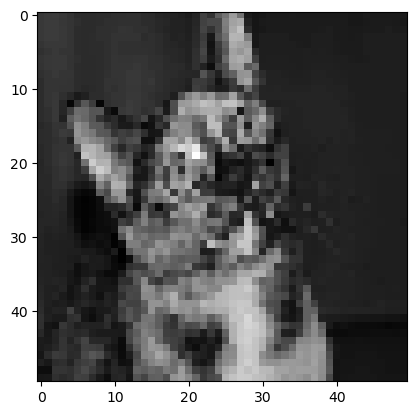

In [88]:

prediction=model.predict(xtest)
accuracy=model.score(xtest,ytest)

print('Accuracy:',accuracy)
print('Prediction:',categories[prediction[0]])
mypet=xtest[2].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()